### 503. Introdução ao Gaussian Mixture
<h1>Tema central: Modelo Gaussian Mixture (GMM)</h1><h2>O que é o GMM</h2><ul><li>Modelo probabilístico que assume que as observações são geradas a partir de um mix de distribuições gaussianas (normais)</li><li>Generalização do k-means que considera não apenas o centroide, mas também o tamanho e forma da região ao redor do centroide</li></ul><h2>Parâmetros principais</h2><ul><li>Média dos centroides</li><li>Matriz de variância de cada feature</li><li>Número de clusters definido pelo usuário</li><li>Pesos diferentes para cada cluster</li></ul><h2>Características</h2><ul><li>Trabalha com dados numéricos contínuos</li><li>Requer especificação prévia do número de grupos</li><li>Avaliação por BIC (Bayesian Information Criterion)</li></ul><h2>Vantagens</h2><ul><li>Modelo recente e em aprimoramento constante</li><li>Identifica classes com diferentes formatos e sobrepostas</li><li>Atribui probabilidade de pertencimento do dado a cada cluster</li></ul><h2>Desvantagens</h2><ul><li>Faz suposições que afetam o modelo</li><li>Não escalável para grandes volumes de dados</li><li>Menos eficiente que outros modelos</li></ul><h2>Funcionamento</h2><ul><li>Inicia centroides aleatoriamente como no k-means</li><li>Itera atribuindo as observações aos clusters com base na distribuição gaussiana, e não distância aos centroides</li><li>Converge após número máximo de iterações ou estabilidade dos clusters</li></ul>


### 504. Gaussian Mixture na prática I
<h2>Tema central: Simulação de clusters com Gaussian Mixture</h2><ul><li><p>Biblioteca utilizada</p><ul><li>GaussianMixture do submódulo sklearn.mixture</li></ul></li><li><p>Parâmetros</p><ul><li>n_components: quantidade de componentes/clusters</li><li>covariance_type: tipo de covariância entre features</li><li>tol: tolerância p/ convergência</li><li>max_iter: quantidade máxima de iterações</li><li>n_init: quantidade de inicializações</li></ul></li><li><p>Atributos importantes</p><ul><li>means_: centroides de cada cluster</li><li>covariances_: matrizes de covariância p/ cada cluster</li><li>weights_: pesos dados p/ cada cluster</li></ul></li><li><p>Avaliação</p><ul><li>BIC: quanto menor, melhor o modelo</li></ul></li><li><p>Previsão</p><ul><li>predict: retorna os clusters que cada observação pertence</li><li>predict_proba: retorna probabilidade de cada observação pertencer a cada cluster</li></ul></li><li><p>Probabilidades</p><ul><li>Retorna array com probabilidades de pertencer a cada cluster</li><li>Cluster com maior probabilidade é atribuído à observação</li></ul></li></ul>


In [62]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [63]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [64]:
# Simulate Clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-0.639544,2.973619
1,-0.204156,2.938277
2,-5.485239,1.244231
3,-4.914271,1.452184
4,-4.847170,8.895061


In [65]:
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
# Create Model 
model = GaussianMixture(n_components=4, covariance_type='spherical')
model.fit(X)

GaussianMixture(covariance_type='spherical', n_components=4)

In [66]:
# Model attributes
# Centroides
model.means_
# Covariances para cada cluster
model.covariances_
# Pesos 
model.weights_

array([0.24696834, 0.25102154, 0.24902653, 0.25298359])

In [67]:
# Modelo BIC
# Avaliando o modelo
model.bic(X)

np.float64(7763.589785492341)

In [68]:
# Predict labels
model.predict(X)[:5]

array([2, 2, 1, 1, 3])

In [69]:
# Diferencial 
# Predict labels' probability
model.predict_proba(X)[:5]

array([[7.80590060e-23, 1.36235981e-09, 9.99999999e-01, 1.31087255e-14],
       [9.44123457e-25, 9.11089113e-11, 1.00000000e+00, 1.45438401e-15],
       [1.91514390e-15, 9.99999458e-01, 5.41830150e-07, 1.66416335e-18],
       [3.31389378e-15, 9.99972187e-01, 2.78131371e-05, 5.59973518e-17],
       [3.52688626e-03, 1.46094417e-20, 5.74024506e-14, 9.96473114e-01]])

In [76]:
model.means_.T

array([[-7.37132703, -5.59413071, -1.2102197 , -4.15620651],
       [ 7.64234143,  0.96327331,  3.1191131 ,  8.63095263]])

### 505. Gaussian Mixture na prática II
<h1>Tema central: Análise de clusters com Gaussian Mixture Models (GMM)</h1><h2>Introdução</h2><ul><li>Explicação sobre como o GMM agrupa os dados em clusters</li><li>Comparação com o K-means quanto à estratégia de definição dos centroides</li></ul><h2>Análise Exploratória</h2><ul><li>Plotagem dos dados com cores representando os rótulos dos clusters</li><li>Observação visual da separação dos clusters</li></ul><h2>Seleção de modelo</h2><ul><li>Teste iterativo variando:<ul><li>Número de clusters (k) de 1 a 8</li><li>Tipos de covariância<ul><li>Full</li><li>Tied</li><li>Diagonal</li><li>Spherical</li></ul></li></ul></li><li>Comparação do BIC para identificar o melhor modelo</li></ul><h2>Modelo final</h2><ul><li>Melhor modelo:<ul><li>4 clusters</li><li>Covariância esférica</li></ul></li><li>Plotagem dos centroides finais</li><li>Possibilidade de detecção de outliers com GMM</li></ul><h2>Conclusão</h2><ul><li>Finalização da parte prática sobre Gaussian Mixture Models</li></ul>

In [70]:
model

GaussianMixture(covariance_type='spherical', n_components=4)

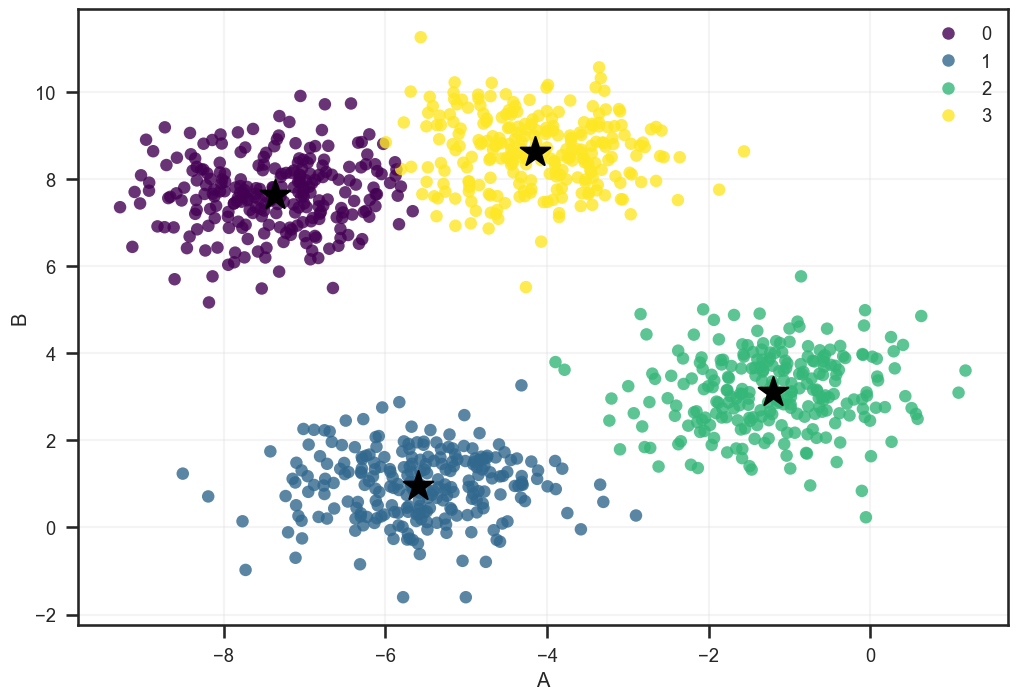

In [79]:
# Plot
labels = model.predict(X)
ax= sns.scatterplot(data=df,x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.means_.T,marker='*', color='black', s = 500)

In [72]:
# Select best model by covariance type an K (Practical Statistic for Data Scientists)
# warm_start aproveita o que foi fitado
results = []
k_range = range(1,9)
covariance_types = ['full','tied','diag', 'spherical']

for n_components in k_range:
    for covariance_type in covariance_types:
        mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
        mclust.fit(X)
        results.append({
            'bic':mclust.bic(X),
            'n_components': n_components,
            'covariance_type': covariance_type,
        })
results =pd.DataFrame(results)
results[:5]

,bic,n_components,covariance_type
0,9769.402793,1,full
1,9769.402793,1,tied
2,9827.089053,1,diag
3,9913.557162,1,spherical
4,8313.674891,2,full


In [73]:
results.sort_values('bic')[:10]

,bic,n_components,covariance_type
13,7757.139796,4,tied
15,7763.589785,4,spherical
17,7773.567027,5,tied
14,7785.609397,4,diag
19,7786.573326,5,spherical
21,7802.347018,6,tied
12,7809.909513,4,full
18,7816.034771,5,diag
25,7819.218196,7,tied
23,7819.898764,6,spherical


<Axes: xlabel='n_components', ylabel='bic'>

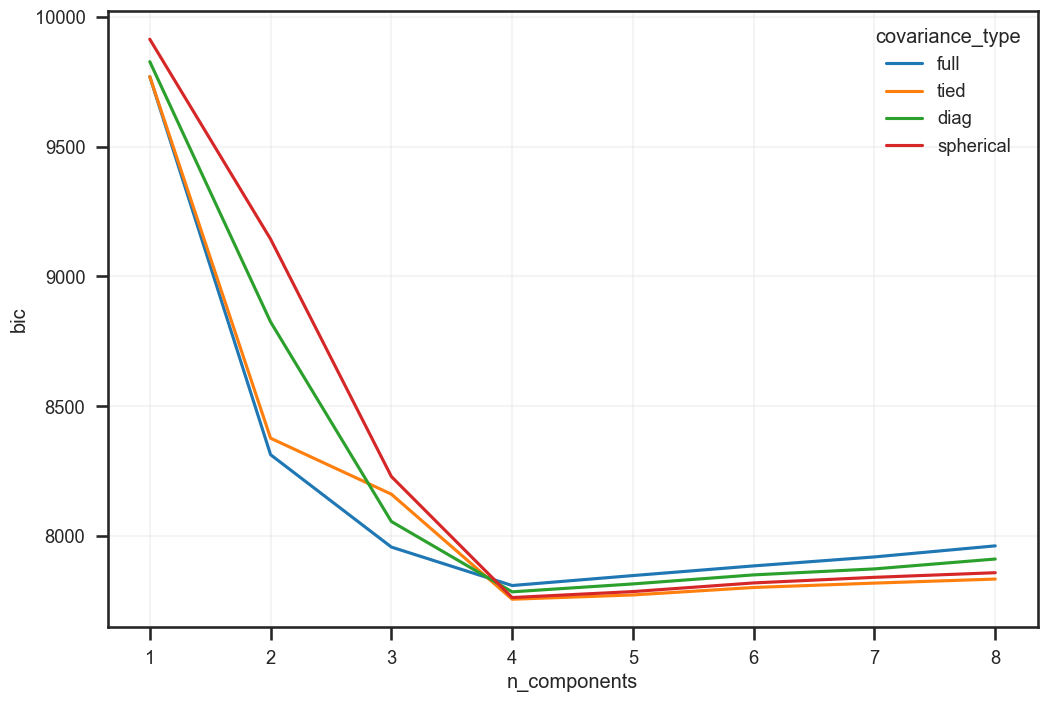

In [74]:
# Plot
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type')